https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   
   0            500
   
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

In [58]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [59]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.shape

(768, 10)

In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
diabetes['Number_pregnant'].head()

0    6
1    1
2    8
3    1
4    0
Name: Number_pregnant, dtype: int64

In [31]:
embarazos = pd.concat([diabetes['Number_pregnant'], 
                       diabetes['Glucose_concentration']], axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(embarazos)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
embarazosNorm = scaler.transform(embarazos)

In [37]:
embarazosNorm

array([[ 0.35294118,  0.74371859],
       [ 0.05882353,  0.42713568],
       [ 0.47058824,  0.91959799],
       ..., 
       [ 0.29411765,  0.6080402 ],
       [ 0.05882353,  0.63316583],
       [ 0.05882353,  0.46733668]])

In [41]:
embarazos['Number_pregnant'].max()


17

In [42]:
embarazos['Number_pregnant'].min()


0

In [44]:
6/17

0.35294117647058826

In [46]:
columnasNormalizar = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age']

In [60]:
diabetes[columnasNormalizar] = diabetes[columnasNormalizar].apply( 
        lambda x: (x - x.mean()) /(x.std() )  )

In [61]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1,B
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0,C
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1,B
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0,B
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1,C


In [62]:
diabetes['Number_pregnant'].mean()

-7.8640797577615259e-17

In [63]:
diabetes['Number_pregnant'].std()

1.0

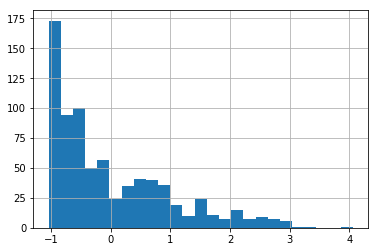

In [81]:
diabetes['Age'].hist(bins=25)